## 2.富士下山問題


勾配降下法は山や谷を下ることに例えられます。富士山の標高データを 最小化したい目的関数 に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

## 3.富士山から下る

標高データの取得
標高データはcsvファイルを配布します。以下のコードで読み込むことができます。


In [1]:
import numpy as np
csv_path = "./data/mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

一部を出力させると、以下のような中身になっています。

<img src="./img/4.jpg">

左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。

《出典》

今回使用するデータは国土地理院の電子地形図の断面図機能を使用し取得しました。相模湾から富士山頂上付近を通り南アルプス方面へと向かう線上300地点の標高データです。

## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [2]:
# グラフ描写用のライブラリインポート
import matplotlib.pyplot as plt

# fujiの形状を表示
print(fuji.shape)

# グラフ化（y軸：その地点の番後、x軸：標高）
plt.plot(fuji[:, 0], fuji[:, 3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.grid('True')
plt.show()

(300, 5)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 640x480 with 1 Axes>

この断面図を見れば低い場所はすぐに分かりますが、今回は暗闇の中で足元の勾配のみが知れるという状況を想像します。

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

<img src="./img/5.jpg">


In [3]:
def slope(x_array, y_array):
    x_diff = x_array[1:] - x_array[:-1]
    y_diff = y_array[1:] - y_array[:-1]
    dy = y_diff / x_diff
    return dy

slope(fuji[:, 0], fuji[:, 3])

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,    0.59,
          4.99,   42.21,  117.15,    6.28,   50.37,   47.17,  158.38,
        -62.02,    8.32,  123.34,  -18.01,   -7.57,  102.68,   30.42,
         44.04,  -26.74,   -1.58,  -54.09,  151.4 ,  -22.01,  177.53,
         96.7 ,  -57.01, -102.16,  -73.94,   27.86,   93.14,  -37.54,
        -78.13,    7.72,  -31.61,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  127.68,   -0.82,
        -20.36,   49.44,   74.7 , -105.62,  -17.92,  -41.59,  -51.04,
        109.86, -110.53,   -1.82,  -64.24, -108.22,  -11.79,  -54.82,
         60.87,  -55.26,  -40.69,    7.33,  -40.17,   24.72,  -41.94,
        -49.98,   -6.61,   13.23,    2.13,    0.15,    6.43,    9.02,
          3.5 ,   28.27,    2.19,   22.4 ,   15.66,   13.16,   16.58,
         16.7 ,   14.44,   17.  ,   17.1 ,   21.43,   13.92,   13.37,
         10.68,   18.67,   28.72,   11.93,   27.79,   25.57,   15.45,
         12.51,   18

## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [4]:
# 四捨五入用にライブラリインポート
from decimal import Decimal

def next_point(current_point, x_array, y_array, alpha=0.2):  # alpha=学習率
    dy = slope(x_array, y_array)  # 勾配のリストを取得
    current_point_dy = dy[current_point]  # 現在地点の勾配を取得
    next_p = current_point - alpha * dy[current_point]  # 移動先の地点を計算
    next_p = int(Decimal(next_p).quantize(Decimal('0')))   # 移動先の地点を四捨五入・int型へ変換
    
    # next_pの値がx軸の上限(勾配計算後のindex数の上限-1)以上なら、next_pをその値へ修正。
    if next_p > len(dy)-1:
        next_p = len(dy)-1
    return next_p  # 移動先の地点を返却

x_test = 100
p = next_point(x_test, fuji[:, 0], fuji[:, 3])
print('x={}のとき、移動先の地点：{}'.format(x_test, p))

x=100のとき、移動先の地点：95


## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [5]:
def down_slope(current_point, x_array, y_array):
    
    ROOP = 25  # for文のループ上限数
    point_list = [current_point]  # 地点を保存するリスト

    for i in range(ROOP):
        # 次の地点を取得
        next_x = next_point(current_point, x_array, y_array)
        
        # 同じ地点が続いたらループを抜ける
        if current_point == next_x:
            break
        
        # 次の地点が0以下なら、リストに0を追加してループを抜ける
        elif next_x <= 0:
            point_list.append(0)
            break
            
        # 勾配降下の途中でROOP上限に達したら例外送出
        ## 課題6を受け、下記をコメントアウト。
        ## 地点160～180付近で溝にハマり無限ループするため、ROOP上限に達したらそこが局地最適解とすることにして処理を続行する。
#         else:
#             assert i+1 < ROOP, "[ERROR] 異常終了しました。計算が完了しなかったため、forループの上限を見直してください。"
        
        # 次の地点をリストへ追加
        point_list.append(next_x)
        
        # 現在地点を更新
        current_point = next_x
        
    return point_list

# 移動毎の地点を取得
x_list = down_slope(136, fuji[:, 0], fuji[:, 3])
x_list

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]

## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

- 断面図の中に移動した地点を点で表示する
- 繰り返し毎の標高や勾配を折れ線グラフにする

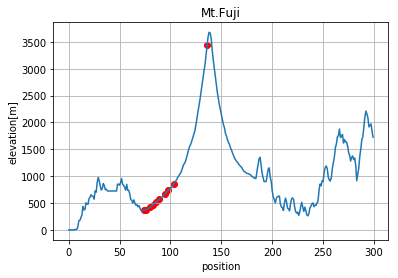

In [6]:
# 移動毎の地点に対応する標高をリスト化
y_list = [fuji[i, 3] for i in x_list]

# グラフ化（y軸：その地点の番後、x軸：標高）
plt.plot(fuji[:, 0], fuji[:, 3])
plt.scatter(x_list, y_list, color='red')
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.grid('True')
plt.show()

## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [7]:
# 全ての勾配降下を計算する関数
def make_all_list():
    all_x_list = []
    for i in range(299):
        all_x_list.append(down_slope(i, fuji[:, 0], fuji[:, 3]))
    return all_x_list


# 初期値を指定して勾配降下のグラフを表示する関数
def graph(initial_value):
    
    # 初期値の地点からのx軸(勾配降下の地点)を取得
    x_list = make_all_list()[initial_value]
    
    # y軸(標高)のリストを作成
    y_list = [fuji[i, 3] for i in x_list]
    
    # グラフ描画処理
    plt.plot(fuji[:, 0], fuji[:, 3])
    plt.scatter(x_list, y_list, color='red')
    plt.title('Mt.Fuji')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.grid('True')
    plt.show()


In [8]:
print("[test]", make_all_list()[136])

[test] [136, 103, 98, 95, 89, 86, 83, 80, 76, 74]


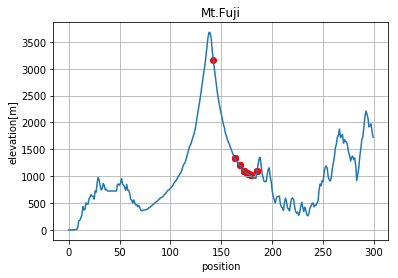

In [9]:
# graph(初期値)でグラフを表示
graph(142)

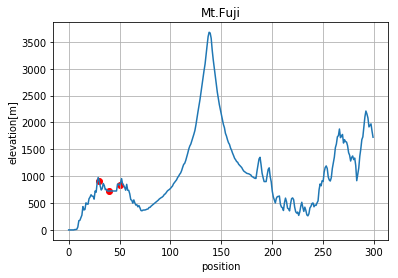

In [10]:
graph(30)

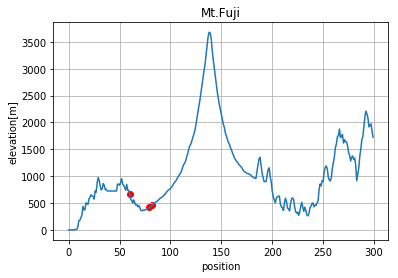

In [11]:
graph(60)

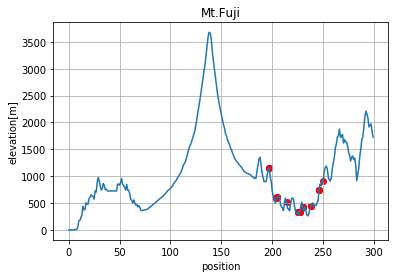

In [12]:
graph(250)

## 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [13]:
# 以下、問題4・問題6の関数を微修正（引数に学習率を追加）

def down_slope(current_point, x_array, y_array, alpha=0.2):
    
    ROOP = 100  # for文のループ上限数
    point_list = [current_point]  # 地点を保存するリスト

    for i in range(ROOP):
        # 次の地点を取得
        next_x = next_point(current_point, x_array, y_array, alpha)
        
        # 同じ地点が続いたらループを抜ける
        if current_point == next_x:
            break
        
        # 次の地点が0以下なら、リストに0を追加してループを抜ける
        elif next_x <= 0:
            point_list.append(0)
            break
            
        # 勾配降下の途中でROOP上限に達したら例外送出
        ## 課題6を受け、下記をコメントアウト。
        ## 地点160～180付近で溝にハマり無限ループするため、ROOP上限に達したらそこが局地最適解とすることにして処理を続行する。
#         else:
#             assert i+1 < ROOP, "[ERROR] 異常終了しました。計算が完了しなかったため、forループの上限を見直してください。"
        
        # 次の地点をリストへ追加
        point_list.append(next_x)
        
        # 現在地点を更新
        current_point = next_x
        
    return point_list

# 全ての勾配降下を計算する関数
def make_all_list(alpha=0.2):  # alpha=学習率
    all_x_list = []
    for i in range(299):
        all_x_list.append(down_slope(i, fuji[:, 0], fuji[:, 3], alpha))
    return all_x_list


# 初期値を指定して勾配降下のグラフを表示する関数
def graph(initial_value, alpha=0.2):  # alpha=学習率
    
    # 初期値の地点からのx軸(勾配降下の地点)を取得
    x_list = make_all_list(alpha)[initial_value]
    
    # y軸(標高)のリストを作成
    y_list = [fuji[i, 3] for i in x_list]
    
    # グラフ描画処理
    plt.plot(fuji[:, 0], fuji[:, 3])
    plt.scatter(x_list, y_list, color='red')
    plt.title('Mt.Fuji')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.grid('True')
    plt.show()

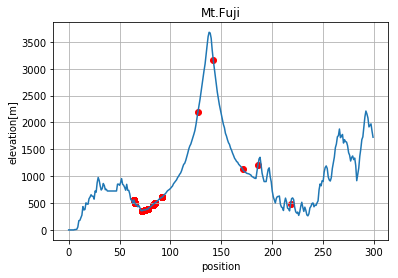

In [14]:
# graph(初期値, 学習率)でグラフを表示
graph(142, 0.5)

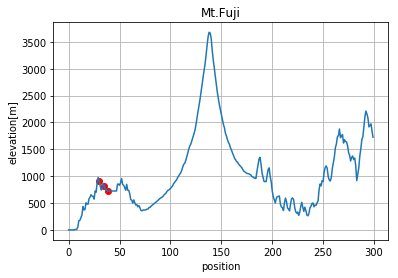

In [15]:
graph(30, 0.05)

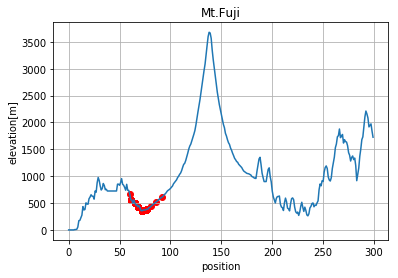

In [16]:
graph(60, 0.3)

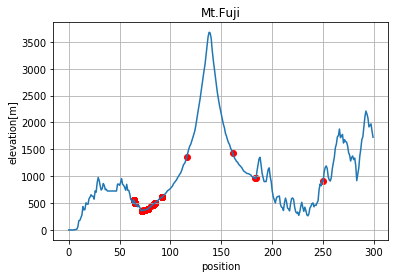

In [17]:
graph(250, 0.5)